# Explore here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'

data = pd.read_csv(url, delimiter=',')

#import urllib.request
#urllib.request.urlretrieve(url, 'demographic_health_data.csv')

list(data.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
le = LabelEncoder()
data["COUNTY_NAME"] = le.fit_transform(data["COUNTY_NAME"])
data["STATE_NAME"] = le.fit_transform(data["STATE_NAME"])

In [5]:
fig, axis = plt.subplots(figsize = (100, 70))
sns.heatmap(data[data.columns].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [6]:
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data_cleaned = data.drop(columns=to_drop)
data_cleaned.dtypes

fips                                                                         int64
TOT_POP                                                                      int64
0-9 y/o % of total pop                                                     float64
10-19 y/o % of total pop                                                   float64
20-29 y/o % of total pop                                                   float64
30-39 y/o % of total pop                                                   float64
40-49 y/o % of total pop                                                   float64
50-59 y/o % of total pop                                                   float64
60-69 y/o % of total pop                                                   float64
80+ y/o % of total pop                                                     float64
% White-alone                                                              float64
Native American/American Indian-alone pop                                    int64
% NA

In [7]:
fig, axis = plt.subplots(figsize = (100, 70))
sns.heatmap(data[data_cleaned.columns].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [8]:
X = data_cleaned.drop("Heart disease_prevalence", axis=1)
y = data_cleaned['Heart disease_prevalence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
linealR_model = LinearRegression()
linealR_model.fit(X_train_scaled, y_train)

y_pred = linealR_model.predict(X_test_scaled)

MSE = mean_squared_error(y_test, y_pred)
R_cuadrado = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {MSE}")
print(f"Coeficiente de determinación: {R_cuadrado}")

Error cuadrático medio: 0.1899111698133152
Coeficiente de determinación: 0.9411349511324405


In [10]:
X = data_cleaned.drop("Heart disease_prevalence", axis=1)
y = data_cleaned['Heart disease_prevalence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
alpha_v = np.logspace(-2, 0, 20)
lasso_grid = GridSearchCV(Lasso(max_iter=3000), param_grid={'alpha': alpha_v}, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train)
mejor_alpha = lasso_grid.best_params_['alpha']

lasso_model = Lasso(alpha=mejor_alpha, max_iter=3000)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)

In [12]:
MSE = mean_squared_error(y_test, y_pred)
R_cuadrado = r2_score(y_test, y_pred)

print(f"Error cuadratico medio: {MSE}")
print(f"Coeficiente de determinacion: {R_cuadrado}")

Error cuadratico medio: 0.2133988831879423
Coeficiente de determinacion: 0.9338546769024214


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+02, tolerance: 7.676e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

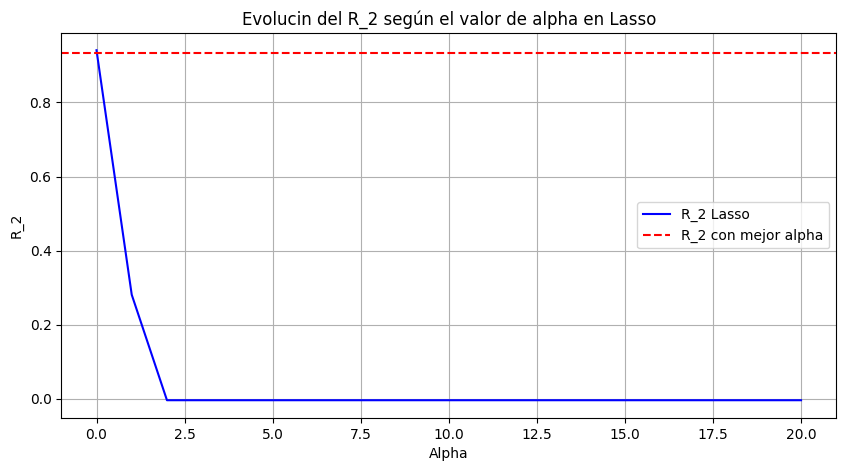

In [13]:
alphas = np.linspace(0, 20, 21)
r2_scores = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred_lasso)
    r2_scores.append(r2)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(alphas, r2_scores, label="R_2 Lasso", color='blue')
plt.axhline(y=R_cuadrado, color='red', linestyle='--', label='R_2 con mejor alpha')
plt.xlabel("Alpha")
plt.ylabel("R_2")
plt.title("Evolucin del R_2 según el valor de alpha en Lasso")
plt.legend()
plt.grid(True)
plt.show()
